# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

ANSWERS:
1. This paper is about how to make the data tidying step of data cleaning as easy and effective as possible.
2. It is itended to make the intial exploration of data much easier, and help define data analysis tools that work well together.
3. The sentence about families means that tidy datasets are similar, constant, and easy to digest, while messy datasets are usually messy in different ways - whether there nan instead of 0 or just incorrect data, there is no catch all method to making a messy dataset non-messy. The sentence about observations vs variables highlight that it is usually unclear (just by looking at the data) the significance of the variables/observations. The data just shows the output of the study conducted, it doesn't include any context that could help deepen understanding of what the numbers mean.
4. Values are the actual numbers or strings - data points. Variables contain all values that relate to a particular attribute. An observation contains all values measured on the same unit, across all attributes.
5. Tidy data is standard way of mapping the meaning of a dataset to its structure. In tidy data each variable forms a column, each observation forms a row, each type of observational unit forms a table.
6. The most common problems are column headers are values, not variable names, multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, and a single observational unit is stored in multiple tables. The data in table 4 is messy because variables are stored in both rows and columns. Melting a dataset is stacking it/transposing it/ turning columns into rows.
7. Table 11 stores variables in both rows and columns - the element column is not a variable, it stores the names of variables. Table 12 has separated tmax and tmin into two columns, and each row is a specific day's reading.
8. Focusing on tidy data and associating the tools used to tidy data will link the tools used to tidy data to tidying data, and so improving data structures or data tidying tools will not improve workflow. Wickham hopes that others will continue to improve and develop different framework and data tidying tools.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [3]:
import numpy as np # Import the numpy package into your workspace
import pandas as pd  # Import the pandas package into your workspace
! git clone https://www.github.com/DS3001/assignment2
df = pd.read_csv('assignment2/data/airbnb_hw.csv',low_memory=False) # Pandas downloads and loads the .csv file for you
var = 'Price'
df['Price']=df['Price'].str.replace(',','')
df[var]=df[var].astype(int)
print(df['Price'].unique(),'\n') # 'n' is not listed in the codebook
print(df['Price'].dtypes) # The types of the variables; `object` is a bad sign
##I cleaned the 'Price' variable by using the replace method to remove all the commas in the column, then I was able
##to typecast the column to int. This is becuase after 999 the numbers were entered with a comma, turning them into strings.

Cloning into 'assignment2'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 36 (delta 8), reused 5 (delta 5), pack-reused 24
Receiving objects: 100% (36/36), 5.47 MiB | 20.58 MiB/s, done.
Resolving deltas: 100% (9/9), done.
[  145    37    28   199   549   149   250    90   270   290   170    59
    49    68   285    75   100   150   700   125   175    40    89    95
    99   499   120    79   110   180   143   230   350   135    85    60
    70    55    44   200   165   115    74    84   129    50   185    80
   190   140    45    65   225   600   109  1990    73   240    72   105
   155   160    42   132   117   295   280   159   107    69   239   220
   399   130   375   585   275   139   260    35   133   300   289   179
    98   195    29    27    39   249   192   142   169  1000   131   138
   113   122   329   101   475   238   272   308   126   235   315   248
   128    56   207 

In [5]:
df = pd.read_csv('assignment2/data/sharks.csv',low_memory=False) # Pandas downloads and loads the .csv file for you

df['unprovoked'] = np.where(df['Type']== 'Unprovoked', True, False)

#df.head()
print(df['unprovoked'].unique(),'\n') # 'n' is not listed in the codebook

##I chose to make another column/variable called 'unprovoked' and if the attack was unprovoked, that variable
##would be true, otherwise it was false.

[ True False] 



In [6]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you
#df.head()
var='WhetherDefendantWasReleasedPretrial'
df[var]=df[var].replace(9,np.nan)
df[var]=df[var].replace(1.0,True)
df[var]=df[var].replace(0.0,False)


print(df[var].value_counts(), '\n') #
print(df['WhetherDefendantWasReleasedPretrial'])

## I saw that the data was either 1.0, 0.0, or 9, I replace the 9 values with NaN, the 1.0 values with True,
##and the 0.0 values with False. This way, we have boolean true and false while still maintaining the NaNs.

True     19154
False     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64 

0          NaN
1        False
2        False
3        False
4         True
         ...  
22981     True
22982     True
22983     True
22984     True
22985     True
Name: WhetherDefendantWasReleasedPretrial, Length: 22986, dtype: object


In [7]:
var='ImposedSentenceAllChargeInContactEvent'

df['was_convicted']=np.where(df[var]== ' ', False, True)
df[var]=df[var].replace(' ',np.nan)

print(df[var].value_counts(), '\n') #
print(df[var],'\n')

print(df['was_convicted'].value_counts(), '\n') #

##I saw that this variable was the months that the defendent was incarcerated for, and that the blank entries were most likely
##cases in which the defendent was not convicted. So I made a new boolean variable named was_convicted, and then changed all the
##empty entries in our original varibale to NaN.

0                   4953
12                  1404
.985626283367556    1051
6                    809
3                    787
                    ... 
49.9712525667351       1
57.0349075975359       1
79.9260780287474       1
42.1642710472279       1
1.6570841889117        1
Name: ImposedSentenceAllChargeInContactEvent, Length: 483, dtype: int64 

0                     NaN
1                      60
2                      12
3        .985626283367556
4                     NaN
               ...       
22981                 NaN
22982                 NaN
22983                 NaN
22984                 NaN
22985                 NaN
Name: ImposedSentenceAllChargeInContactEvent, Length: 22986, dtype: object 

True     13933
False     9053
Name: was_convicted, dtype: int64 



**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [9]:
df = pd.read_csv('assignment2/data/airbnb_hw.csv',low_memory=False)
var = 'Price'
df['Price']=df['Price'].str.replace(',','')
df[var]=df[var].astype(int)
df.info()
##### 13 columns (variables), 30478 observations
#df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  int64  
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(4), object

In [10]:
df.head()
pd.crosstab(df['Room Type'], df['Property Type'])
######bed and breakfast and house properties are more likely to rent out private
######rooms rather than the entire property

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


Mean:  163.58973685937397
Median:  125.0
Mode:  0    150
Name: Price, dtype: int64


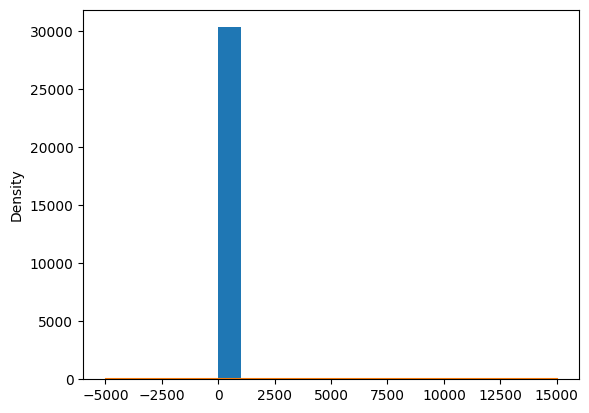

In [11]:
df[var].hist()
df[var].plot.density()
print('Mean: ', df[var].mean() )
print('Median: ', df[var].median() )
print('Mode: ', df[var].mode() )
######These are really badly scaled, they aren't usable

<Axes: ylabel='Density'>

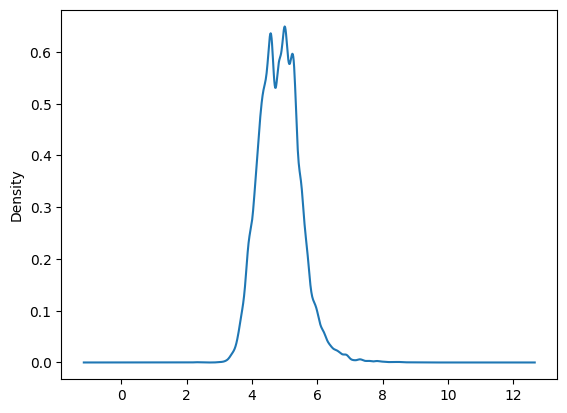

In [12]:
df['price_log']=np.log(df[var])
#df.loc[df['price_log']>0,'price_log'].hist(bins=20,grid=False)
df.loc[df['price_log']>0,'price_log'].plot.density()
#######These are scaled much better, way more useful to use.

<Axes: xlabel='price_log', ylabel='Beds'>

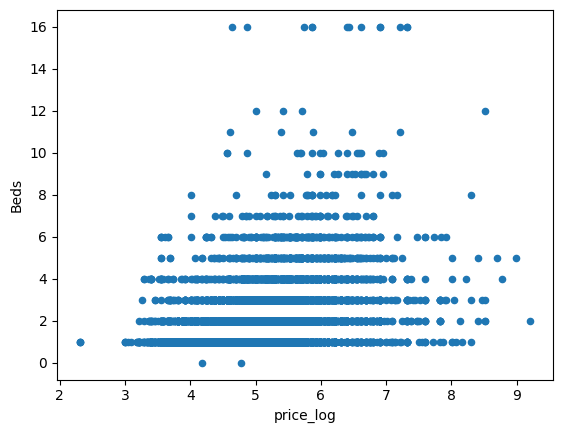

In [13]:
df.plot.scatter(y='Beds',x='price_log')
##You can see that there is a correlation between price and beds. (The lower prices are more densly related to lower number of beds)

In [15]:
df['Price'].groupby(df['Beds']).describe()
###The average price certainly increases per bed, but the price std does not have a very strong correlation with number of beds

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20344.0,127.673810,107.047827,10.0,75.00,100.0,155.00,4000.0
2.0,6610.0,199.061271,225.706318,25.0,115.00,160.0,225.00,10000.0
3.0,2071.0,268.118300,303.106942,26.0,140.00,200.0,300.00,5000.0
4.0,783.0,315.332056,353.184402,27.0,150.00,247.0,375.00,6500.0
5.0,284.0,411.500000,672.610659,35.0,189.75,290.0,450.00,8000.0
6.0,177.0,401.768362,417.018431,35.0,199.00,275.0,425.00,2750.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,24.0,589.041667,793.054934,55.0,243.75,350.0,481.25,4000.0


In [22]:
import seaborn as sns # Import Seaborn
#sns.scatterplot(data=df, x='price_log', y='Beds', hue='Room Type')
#ax = sns.scatterplot(data=df, x='price_log', y='Beds', hue='Property Type')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
######It is hard to see patterns on the scatter plot colored by property type, but colored by room type it is easy to see that the most expensive homes are the whole house/apt
#df['Price'].groupby(df['Room Type']).describe()
df['Price'].groupby(df['Property Type']).describe()
###Entire home/apt has the highest prices and highest standard deviation out of the room types. "Other" has the highest price and std
###out of the property types. The median appears to be a more reliable estimate of central tendency because of how large the standard deviations are.

,count,mean,std,min,25%,50%,75%,max
Property Type,,,,,,,,
Apartment,27102.0,162.045642,181.376882,10.0,85.00,130.0,195.00,10000.0
Bed & Breakfast,180.0,106.572222,84.701977,30.0,65.00,87.5,125.00,900.0
Boat,8.0,153.625000,49.231051,100.0,120.00,137.5,178.50,250.0
Bungalow,4.0,150.750000,46.464144,87.0,133.50,160.5,177.75,195.0
Cabin,2.0,165.000000,120.208153,80.0,122.50,165.0,207.50,250.0
Camper/RV,7.0,103.571429,102.343958,39.0,47.00,49.0,109.00,325.0
Castle,1.0,150.000000,NaN,150.0,150.00,150.0,150.00,150.0
Chalet,1.0,99.000000,NaN,99.0,99.00,99.0,99.00,99.0
Condominium,94.0,256.585106,249.357946,46.0,131.25,175.0,298.75,1990.0


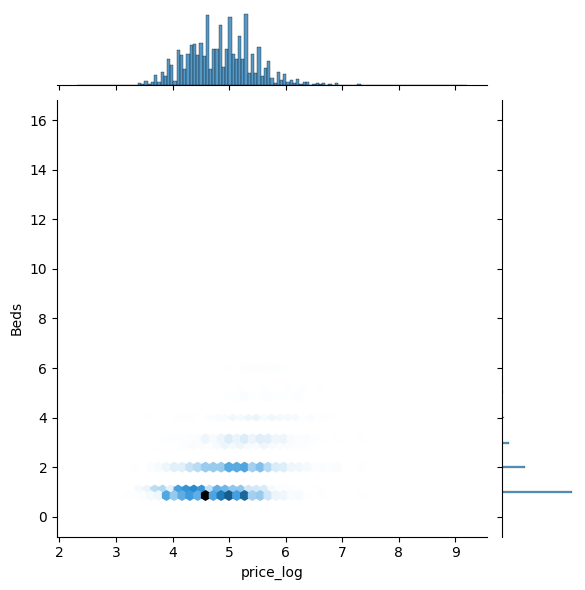

In [25]:
#We've looked a bit at this price_log and Beds scatterplot. Use seaborn to make a jointplot with kind=hex.
# Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

sns.jointplot(data=df,x="price_log",y='Beds',kind='hex')
######The data is actually distributed in the bottom left portion of the graph, but the previous graphs make you think that the data are actually more spread out.
######It's helpful to see that the majority of the data are from cheaper properties with fewer beds.


**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.